# Problem 1: Stiff IVPs with Euler, RK4 and Trapezoidal Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## IVP Setup

Consider the following IVP: $y' = -50y + 50sin(t) + cos(t)$ with initial condition $y(0) = 1$. We restrict domain to be $0 \leq t \leq 2$ and $h = 0.1$

In [2]:
# f: ODE, y0: initial condition, h: step size, t0 = domain start, T = domain end
f = lambda t, y : (-50 * y)  + (50 * np.sin(t)) + np.cos(t)
y0 = 1
h = 0.1
t0 = 0
T = 2
interval = T-t0

# number of mesh points (N+1)
N = interval/h
mesh = int(N+1)

# generating t - domain array
t = np.linspace(t0,T, mesh)

# ANALYTICAL SOLUTION (for comparison)
y_analytical = lambda t: np.sin(t) + np.exp(-50 * t)
t_act = np.linspace(t0,T, 200)
y_act = y_analytical(t_act)

## Euler's Method

Euler Method generated ... 
[ 1.00000000e+00 -3.90000000e+00  1.61986675e+01 -6.37033167e+01
  2.56386401e+02 -1.02350641e+03  4.09651052e+03 -1.63831363e+04
  6.55358429e+04 -2.62139715e+05  1.04856284e+06 -4.19424709e+06
  1.67769929e+07 -6.71079668e+07  2.68431872e+08 -1.07372748e+09
  4.29490994e+09 -1.71796398e+10  6.87185590e+10 -2.74874236e+11
  1.09949694e+12]


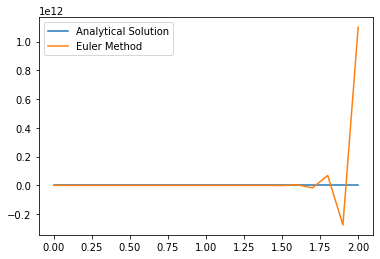

In [3]:
# y_euler - solution array
y_euler = np.zeros((mesh))
y_euler[0] = y0

### Eulers Method ###
for i in range(0, len(t)-1):
    y_euler[i+1] = y_euler[i] + h*f(t[i],y_euler[i])

print("Euler Method generated ... ")

print(y_euler)

### Plotting with analytical solution ###
plt.plot(t_act, y_act, label = "Analytical Solution")
plt.plot(t, y_euler, label = "Euler Method")
plt.legend()

## RK4 Method

RK4 Method generated ... 
[1.00000000e+00 1.38078630e+01 1.88111307e+02 2.57626171e+03
 3.53125885e+04 4.84071870e+05 6.63581253e+06 9.09659231e+07
 1.24699119e+09 1.70941708e+10 2.34332592e+11 3.21230928e+12
 4.40354064e+13 6.03652030e+14 8.27506324e+15 1.13437325e+17
 1.55503667e+18 2.13169610e+19 2.92220007e+20 4.00584926e+21
 5.49135169e+22]


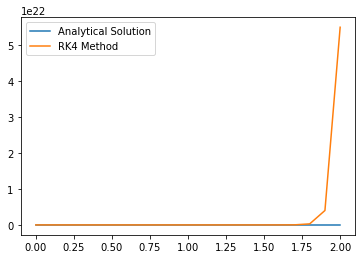

In [4]:
# y_rk - solution array
y_rk = np.zeros((mesh))
y_rk[0] = y0

####### RK4 method #######
for i in range(0, len(t)-1):
    S1 = f(t[i],y_rk[i])
    S2 = f(t[i]+(h/2.0), y_rk[i]+((h/2.0)*S1))
    S3 = f(t[i]+(h/2.0), y_rk[i]+((h/2.0)*S2))
    S4 = f(t[i]+h, y_rk[i]+(h*S3))
    y_rk[i+1] = y_rk[i] + (h/6.0)*(S1 + (2*S2) + (2*S3) + S4)

print("RK4 Method generated ... ")
print(y_rk)

### Plotting with analytical solution ###
plt.plot(t_act, y_act, label = "Analytical Solution")
plt.plot(t, y_rk, label = "RK4 Method")
plt.legend()

## Trapezoidal Method

Trapezoidal Method generated ... 
[ 1.         -0.32876179  0.38232945  0.21678566  0.42313936  0.46495224
  0.57082502  0.64154907  0.71848237  0.78282851  0.84167074  0.89110991
  0.93207113  0.96353695  0.98545362  0.99749045  0.99957505  0.99166607
  0.97385133  0.94630506  0.90930411]


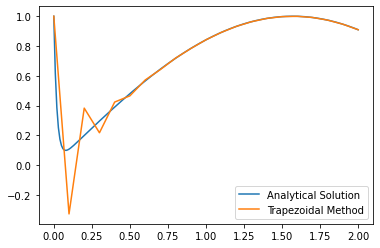

In [5]:
# y_trap - solution array
y_trap = np.zeros((mesh))
y_trap[0] = y0

####### Trapezoidal method #######
for i in range(0, len(t)-1):
    y_trap[i+1] = (-3/7)*y_trap[i] + (1/70)*(50*np.sin(t[i]) + np.cos(t[i]) + 50*np.sin(t[i+1]) + np.cos(t[i+1]))

print("Trapezoidal Method generated ... ")
print(y_trap)

### Plotting with analytical solution ###
plt.plot(t_act, y_act, label = "Analytical Solution")
plt.plot(t, y_trap, label = "Trapezoidal Method")
plt.legend()

# Problem 2: Solving IVPs with Multi-Step Methods (AB2 and AM2)

Consider the following IVP: $y' = -5y + 5t^2 + 2t$ with initial condition $y(0) = \frac{1}{3}$. We will restrict domain to $0 \leq t \leq 2$ and use step size $ h = 0.1$ 

## AB2 Method

We first must use RK4 method using h = 0.01 to get solution at t = 0.1 before performing the AB2 method 

### IVP Setup for RK4 method

In [7]:
# f: ODE, y0: initial condition, h: step size, t0 = domain start, T = domain end
f = lambda t, y : (-5 * y) + (5 * (t ** 2)) + (2 * t) 
y0 = 1/3
h = 0.01
t0 = 0
T = 0.1
interval = T-t0

# number of mesh points (N+1)
N = interval/h
mesh = int(N+1)

# generating t - domain array
t = np.linspace(t0,T, mesh)

## RK4 Method

In [8]:
# y_rk - solution array
y_rk = np.zeros((mesh))
y_rk[0] = y0

####### RK4 method #######
for i in range(0, len(t)-1):
    S1 = f(t[i],y_rk[i])
    S2 = f(t[i]+(h/2.0), y_rk[i]+((h/2.0)*S1))
    S3 = f(t[i]+(h/2.0), y_rk[i]+((h/2.0)*S2))
    S4 = f(t[i]+h, y_rk[i]+(h*S3))
    y_rk[i+1] = y_rk[i] + (h/6.0)*(S1 + (2*S2) + (2*S3) + S4)

print("RK4 Method generated ... ")
print(y_rk)

RK4 Method generated ... 
[0.33333333 0.31717648 0.30201247 0.28780266 0.27451025 0.26210027
 0.25053941 0.23979604 0.22984002 0.22064272 0.21217689]


### IVP Setup for AB2

In [10]:
# f: ODE, y0: initial condition, h: step size, t0 = domain start, T = domain end
f = lambda t, y : (-5 * y) + (5 * (t ** 2)) + (2 * t) 
y0 = 1/3
h = 0.1
t0 = 0
T = 2
interval = T-t0

# number of mesh points (N+1)
N = interval/h
mesh = int(N+1)

# generating t - domain array
t = np.linspace(t0,T, mesh)

# ANALYTICAL SOLUTION (for comparison)
y_analytical = lambda t: (t**2) + (1/3) * (np.exp(-5 * t))
t_act = np.linspace(t0,T, 200)
y_act = y_analytical(t_act)

## AB2 Method

In [15]:
# y_ab2 - solution array
y_ab2 = np.zeros((mesh))
y_ab2[0] = y0
y_ab2[1] = y_rk[len(y_rk)-1]

####### AB2 method #######
for i in range(1, len(t)-1):
    y_ab2[i+1] = y_ab2[i] + h * (((3/2) * f(t[i], y_ab2[i])) - ((1/2) * f(t[i-1], y_ab2[i-1])))

print("AB2 Method generated ... ")
print(y_ab2)

AB2 Method generated ... 
[0.33333333 0.21217689 0.17387756 0.17401361 0.21447279 0.2846216
 0.3822736  0.5042238  0.64912435 0.81583704 1.00374035 1.21239435
 1.44153367 1.690982   1.96062892 2.25040273 2.56025791 2.89016516
 3.24010577 3.61006773 4.00004338]


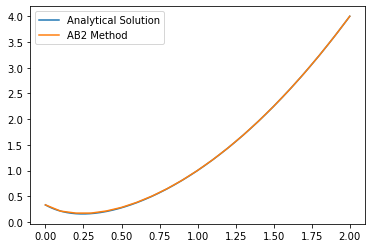

In [16]:
### Plotting with analytical solution ###
plt.plot(t_act, y_act, label = "Analytical Solution")
plt.plot(t, y_ab2, label = "AB2 Method")
plt.legend()

### IVP Setup for AM2

In [17]:
# f: ODE, y0: initial condition, h: step size, t0 = domain start, T = domain end
f = lambda t, y : (-5 * y) + (5 * (t ** 2)) + (2 * t) 
y0 = 1/3
h = 0.1
t0 = 0
T = 2
interval = T-t0

# number of mesh points (N+1)
N = interval/h
mesh = int(N+1)

# generating t - domain array
t = np.linspace(t0,T, mesh)

# ANALYTICAL SOLUTION (for comparison)
y_analytical = lambda t: (t**2) + (1/3) * (np.exp(-5 * t))
t_act = np.linspace(t0,T, 200)
y_act = y_analytical(t_act)

### AM2 Method

AM2 Method generated ... 
[0.33333333 0.21217689 0.16304013 0.16485582 0.20554253 0.27770815
 0.37685769 0.50025625 0.64623992 0.81379638 1.00230972 1.21140524
 1.44085495 1.69052015 1.96031646 2.25019254 2.56011714 2.89007127
 3.24004336 3.61002638 4.00001605]


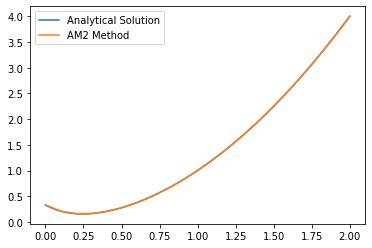

In [19]:
# y_ab=m2 - solution array
y_am2 = np.zeros((mesh))
y_am2[0] = y0
y_am2[1] = y_rk[len(y_rk)-1]

####### AM2 method #######
for i in range(1, len(t)-1):
    A = y_am2[i]
    B = (1/24) *  ( (5*(t[i+1]**2)) + 2*t[i+1] )
    C = 8 * (-5 * y_am2[i] + (5*(t[i]**2)) + 2*t[i])
    D = -1 * (-5 * y_am2[i-1] + (5*(t[i-1]**2)) + 2*t[i-1])
    y_am2[i+1] = (24/29) * (A + B + ((1/120) * (C + D)))

print("AM2 Method generated ... ")
print(y_am2)

### Plotting with analytical solution ###
plt.plot(t_act, y_act, label = "Analytical Solution")
plt.plot(t, y_am2, label = "AM2 Method")
plt.legend()